In [19]:
import numpy as np
import pickle
import h5py
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import sys
sys.path.append("../")
from functions import *

In [7]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 8,
    "font.size": 7,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)

%config InlineBackend.figure_format = 'retina'

In [3]:
# def set_size(width, fraction=1, subplots=(1, 1)):
#     """Set figure dimensions to avoid scaling in LaTeX.

#     Parameters
#     ----------
#     width: float or string
#             Document width in points, or string of predined document type
#     fraction: float, optional
#             Fraction of the width which you wish the figure to occupy
#     subplots: array-like, optional
#             The number of rows and columns of subplots.
#     Returns
#     -------
#     fig_dim: tuple
#             Dimensions of figure in inches
#     """
#     if width == 'thesis':
#         width_pt =cccc
#     elif width == 'beamer':
#         width_pt = 307.28987
#     else:
#         width_pt = width

#     # Width of figure (in pts)
#     fig_width_pt = width_pt * fraction
#     # Convert from pt to inches
#     inches_per_pt = 1 / 72.27

#     # Golden ratio to set aesthetic figure height
#     # https://disq.us/p/2940ij3
#     golden_ratio = (5**.5 - 1) / 2

#     # Figure width in inches
#     fig_width_in = fig_width_pt * inches_per_pt
#     # Figure height in inches
#     fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

#     return (fig_width_in, fig_height_in)


## load data

In [8]:
with open('F:/Projects/PAE_PlaceCell/swr_data/post_processed/swr_df_maps.pkl', 'rb') as f:
    df = pickle.load(f)
    ripple_map = pickle.load(f)
    filtered_map = pickle.load(f)
    phase_map = pickle.load(f)
    amp_map = pickle.load(f)
    freq_map = pickle.load(f)
    
df = df.reset_index()
df['ripple_number'] = np.arange(0,len(df),1)

df = df.drop(columns=['index'])
df

,ripple_number,start_time,end_time,ripple_duration,max_emg,peak_time,peak_channel,peak_amplitude,peak_freq,clipped,session,rat
0,0,66.2624,66.3792,0.1168,0.997065,66.3112,3,6.221621,174.029756,0.000000,LEM3116_S20180715121821,LEM3116
1,1,149.9824,150.1512,0.1688,0.989532,150.1128,1,6.893002,217.563367,0.006667,LEM3116_S20180715121821,LEM3116
2,2,343.5024,343.5952,0.0928,0.995268,343.5472,3,7.195949,212.566470,0.000000,LEM3116_S20180715121821,LEM3116
3,3,344.2784,344.4000,0.1216,0.988154,344.3720,3,5.758124,230.841531,0.000000,LEM3116_S20180715121821,LEM3116
4,4,441.4600,441.6208,0.1608,0.986499,441.5536,4,5.181640,158.973213,0.000000,LEM3116_S20180715121821,LEM3116
...,...,...,...,...,...,...,...,...,...,...,...,...
52602,52602,115.8936,116.0488,0.1552,0.445488,115.9440,4,5.989715,209.285805,0.000000,RH16_S20161207130000,RH16
52603,52603,769.6008,769.6736,0.0728,0.170989,769.6200,2,7.993862,192.961786,0.006667,RH16_S20161207130000,RH16
52604,52604,1106.5360,1106.6128,0.0768,0.118062,1106.5720,2,9.221199,205.013810,0.000000,RH16_S20161207130000,RH16
52605,52605,1189.0416,1189.2408,0.1992,0.142649,1189.1168,2,7.268366,205.098888,0.013333,RH16_S20161207130000,RH16


In [9]:
control=('RH13','RH14','LS21','LS23','LE2821','LE2823','LEM3116','LEM3120','LEM3216')
pae=('RH11','RH16','LS17','LS19','LE2813','LEM3124','LEM3206','LEM3246')

df['group'] = np.ones_like(df.session)

regstr = '|'.join(control)
idx = df['session'].str.upper().str.contains(regstr)    
df.group[idx] = 'control'

regstr = '|'.join(pae)
idx = df['session'].str.upper().str.contains(regstr)    
df.group[idx] = 'pae'

df

<ipython-input-9-3c0d3cf58d4d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.group[idx] = 'control'
<ipython-input-9-3c0d3cf58d4d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.group[idx] = 'pae'


,ripple_number,start_time,end_time,ripple_duration,max_emg,peak_time,peak_channel,peak_amplitude,peak_freq,clipped,session,rat,group
0,0,66.2624,66.3792,0.1168,0.997065,66.3112,3,6.221621,174.029756,0.000000,LEM3116_S20180715121821,LEM3116,control
1,1,149.9824,150.1512,0.1688,0.989532,150.1128,1,6.893002,217.563367,0.006667,LEM3116_S20180715121821,LEM3116,control
2,2,343.5024,343.5952,0.0928,0.995268,343.5472,3,7.195949,212.566470,0.000000,LEM3116_S20180715121821,LEM3116,control
3,3,344.2784,344.4000,0.1216,0.988154,344.3720,3,5.758124,230.841531,0.000000,LEM3116_S20180715121821,LEM3116,control
4,4,441.4600,441.6208,0.1608,0.986499,441.5536,4,5.181640,158.973213,0.000000,LEM3116_S20180715121821,LEM3116,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52602,52602,115.8936,116.0488,0.1552,0.445488,115.9440,4,5.989715,209.285805,0.000000,RH16_S20161207130000,RH16,pae
52603,52603,769.6008,769.6736,0.0728,0.170989,769.6200,2,7.993862,192.961786,0.006667,RH16_S20161207130000,RH16,pae
52604,52604,1106.5360,1106.6128,0.0768,0.118062,1106.5720,2,9.221199,205.013810,0.000000,RH16_S20161207130000,RH16,pae
52605,52605,1189.0416,1189.2408,0.1992,0.142649,1189.1168,2,7.268366,205.098888,0.013333,RH16_S20161207130000,RH16,pae


## get event times per session


In [10]:
data_path = 'F:\\Projects\\PAE_PlaceCell\\ProcessedData\\'
dicts = {}
for session in df.session:
    f = h5py.File(data_path+session+'.mat','r')
    ex_ep = []
    for i in range(f['events'].shape[0]):
        ex_ep.append(f['events'][i])
    dicts[session] = ex_ep

## look at ripples on the linear track (first session)

### recording session
* pedestal
* linear track
* pedestal
* cylinder 1
* pedestal
* cylinder 2 rotated
* pedestal


In [133]:
session = df.session[0]
print(dicts[session])
for ep in np.arange(0,len(dicts[session])*3):
    print(ep)
    
b = np.hstack(dicts[session])
b = np.insert(b,0,0)
b = list(b)
last_rip = max(df.end_time[df.session == session])
if b[-1] < last_rip:
    b.append(last_rip)
print(b)

[array([  1.418742, 792.519798]), array([ 978.294915, 1782.303342]), array([1998.232449, 2898.583157])]
0
1
2
3
4
5
6
7
8
[0.0, 1.418742, 792.519798, 978.294915, 1782.303342, 1998.232449, 2898.583157]


In [ ]:
ep_type = ['pedestal_1','track','pedestal_2','cylinder_1','pedestal_3','cylinder_2','pedestal_4']
df['ep_type'] = np.ones_like(df.session)
# session_df=pd.DataFrame()
for session in np.unique(df.session):
    # stack epoch times
    b = np.hstack(dicts[session])
    
    # add 0 to start to indicate the start of the recording session
    b = np.insert(b,0,0)
    
    # add the ts of the last ripple of the session to indicate end of session
    b = list(b)
    last_rip = max(df.end_time[df.session == session])
    if b[-1] < last_rip:
        b.append(last_rip)
    
    # loop through each epoch and label each ripple
    for ep in range(len(b)-1):
        idx = (df.session == session) & (df.peak_time >= b[ep]) & (df.peak_time <= b[ep+1])
        df['ep_type'][idx] = ep_type[ep]

df

In [235]:
df.to_csv('F:/Projects/PAE_PlaceCell/swr_data/post_processed/swr_df.csv')

In [151]:
pd.unique(df.ep_type[df.session == df.session[500]])

array(['pedestal_1', 'track', 'pedestal_2', 'cylinder_1', 'pedestal_3',
       'cylinder_2', 'pedestal_4'], dtype=object)

In [12]:
df.ep_type.nunique()
df_ = df.groupby('ep_type')['ripple_number'].nunique()
print(df_)

ep_type
cylinder_1    12543
cylinder_2    15824
pedestal_1     1670
pedestal_2     5308
pedestal_3     3984
pedestal_4     1279
track         11999
Name: ripple_number, dtype: int64


## choose epoch type to look at

In [13]:
epoch = 'track'

In [202]:
# 'pedestal' in df.ep_type 


# df.ep_type[df['ep_type'].str.contains("pedestal")] = "pedestal"


<ipython-input-202-4025853273cb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ep_type[df['ep_type'].str.contains("pedestal")] = "pedestal"


In [93]:
# ep = 0
# session_df=pd.DataFrame()
# for session in np.unique(df.session):
#     # check if epoch exists
#     if ep in np.arange(0,len(dicts[session])):
#         idx = (df.session == session) & (df.peak_time >= dicts[session][ep][0]) & (df.peak_time <= dicts[session][ep][1])
#         session_df = session_df.append(df[idx],ignore_index=True)
#     else:
#         print(session)

In [14]:
def bin_data(x,min_t=0,max_t=1,dt=0.01):
    bin_edges = np.arange(min_t,max_t,dt)
    bin_centers = np.arange(min_t+dt,max_t,dt)
    hist, bin_edges = np.histogram(x,bins=bin_edges)
    return hist,bin_centers,bin_edges

def peak_inter_ripple_freq(df):
    intra_ripple_interval = []
    cv = []
    hists = []
    sessions = []
    group = []
    ep_type = []
    for i,r in enumerate(pd.unique(df.session)):
        if sum(df.session == r) < 1:
            continue
            
        temp_df = df[df.session == r]   
        
        hist,bin_centers,bin_edges=bin_data(np.diff(df.peak_time[df.session == r]))
        if sum(hist) == 0:
            continue
            
        # compute inter-ripple-interval    
        x = np.diff(df.peak_time[df.session == r])
        
        # restrict to 1 second
        x = x[x<=1]
        
#         if len(x) < 5:
#             continue
            
#         cv.append(np.std(x)/np.mean(x))
        cv.append(np.sqrt(np.exp(np.std(x)**2)-1))
        
#         intra_ripple_interval.append(bin_centers[np.argmax(hist)])
        intra_ripple_interval.append(np.median(x))

        
        hists.append(hist/hist.sum())
        
        sessions.append(r)
        group.append(temp_df.group.iloc[0])
        ep_type.append(temp_df.ep_type.iloc[0])

    hists = np.vstack(np.array(hists))
    
    df = pd.DataFrame()
    df['session'] = sessions
    df['group'] = group
    df['ep_type'] = ep_type
    df['intra_ripple_interval'] = intra_ripple_interval
    df['cv'] = cv

    return df,hists

df_inter_ripple,hists = peak_inter_ripple_freq(df)

# iri_df_1=pd.DataFrame()


# iri,cv,hists = peak_inter_ripple_freq(session_df[(df.group=='control') & (df.ep_type==epoch)])
# iri_df_1['iri'] = iri
# iri_df_1['cv'] = cv
# iri_df_1['group'] = 'control'

# iri_df_2=pd.DataFrame()
# iri,cv,hists = peak_inter_ripple_freq(session_df[(df.group=='pae') & (df.ep_type==epoch)])
# iri_df_2['iri'] = iri
# iri_df_2['cv'] = cv
# iri_df_2['group'] = 'pae'

# iri_df = pd.DataFrame()
# iri_df = iri_df.append(iri_df_1,ignore_index=True)
# iri_df = iri_df.append(iri_df_2,ignore_index=True)
# iri_df

In [281]:
df_inter_ripple.to_csv('F:/Projects/PAE_PlaceCell/swr_data/post_processed/swr_inter_ripple_interval.csv')

In [181]:
sns.color_palette("rocket",2)
sns.color_palette('CMRmap_r')

[(0.9, 0.8805882352941177, 0.44823529411764707),
 (0.9, 0.6774509803921569, 0.07098039215686275),
 (0.9419607843137255, 0.39509803921568626, 0.06294117647058824),
 (0.7678431372549019, 0.22098039215686274, 0.3531372549019608),
 (0.38705882352941173, 0.1645098039215686, 0.6774509803921569),
 (0.16941176470588235, 0.15, 0.5323529411764706)]

In [ ]:
# sns.set(style="whitegrid")
import matplotlib.ticker as ticker

fig, axs = plt.subplots(1,4, figsize=set_size('thesis', fraction=1.2, subplots=(1, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=1)
axs = axs.ravel()

# set params
x = 'group'
linewidth = 1.25
width = .9

# palette = ['dimgrey','gold']
# palette = sns.color_palette("rocket",2)
# palette = ['772b58ff','db6e59ff']
# palette = ['#333333','#ffa500ff']
# palette = sns.color_palette("Set2")

# Create an array with the colors you want to use
colors = ['dimgrey','#ffa500ff']
# colors = ['#902a81ff','#fecc8fff']

# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

# plot
axs[0] = sns.violinplot(x=x, y="ripple_duration", data=df[df.ep_type==epoch],
               linewidth=linewidth,width=width,ax=axs[0])
axs[0].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
axs[0].set_ylabel('Event duration (sec)')

axs[1] = sns.violinplot(x=x, y="peak_freq", data=df[df.ep_type==epoch],
               linewidth=linewidth,width=width,ax=axs[1])
axs[1].yaxis.set_major_locator(ticker.MultipleLocator(25))
axs[1].set_ylabel('Event freq. (Hz)')

axs[2] = sns.violinplot(x=x, y="peak_amplitude", data=df[df.ep_type==epoch],
               linewidth=linewidth,width=width,ax=axs[2])
axs[2].yaxis.set_major_locator(ticker.MultipleLocator(5))
axs[2].set_ylabel('Event amp. (zscore)')

axs[3] = sns.violinplot(x=x, y="intra_ripple_interval", data=df_inter_ripple[df_inter_ripple.ep_type==epoch],
               linewidth=linewidth,width=width,ax=axs[3])
axs[3].yaxis.set_major_locator(ticker.MultipleLocator(0.2))
axs[3].set_ylabel('Inter-event-int. (sec)')

# clean up  box
for i in range(4):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].set_xlabel('')
#     start, end = axs[i].get_ylim()
#     axs[i].yaxis.set_ticks(np.linspace(start, end, 3))


fig.text(0.5, -.3, 'Group', ha='center')

# save plot
plt.savefig('D:/ryanh/GoogleDrive/school_work/UNM/Lab/Projects/Dissertation/dissertation/inkscape_figs/ripple_features_'+epoch+'.svg',dpi=900,bbox_inches='tight')

In [214]:
from scipy.stats import mannwhitneyu
x1 = df.ripple_duration[df.group == 'control']
x2 = df.ripple_duration[df.group == 'pae']
print(len(x1),len(x2))
print('median difference:',np.median(x1) - np.median(x2))
stat, p = mannwhitneyu(x1,x2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

27436 25171
median difference: 0.008799999999894226
Statistics=299699480.500, p=0.000


In [231]:
import dabest
dabest_df = dabest.load(data=df[df.ep_type==epoch], x="group", y="ripple_duration",
                          idx=("control", "pae"))
# flatui = ["#333333","#FFA500"]
# dabest_df.cliffs_delta.plot(raw_marker_size=1,custom_palette=flatui,fig_size=(6, 6),float_contrast=False)

# dabest_df.cliffs_delta.results

In [230]:
dabest_df.cliffs_delta.keys()

AttributeError: 'EffectSizeDataFrame' object has no attribute 'keys'

In [232]:
dabest_df.cliffs_delta.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_brunner_munzel,statistic_brunner_munzel
0,control,pae,6636,5605,Cliff's delta,False,-0.079172,95,-0.099116,-0.058182,0.0,4.040351e-14,-7.569156


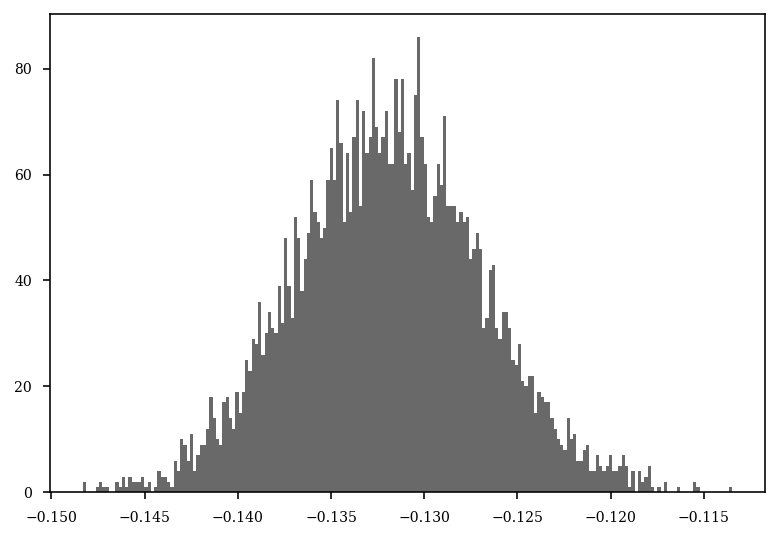

In [229]:
plt.hist(dabest_df.cliffs_delta.results.bootstraps[0],200)
plt.show()